In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

C:\Users\Kimlang\AppData\Roaming\Python\Python314\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load dataset
dataset = load_dataset("CADT-IDRI/Khmer_News_classification")
# Covert to pandas DataFrame
train_df = dataset["train"].to_pandas()[["content", "label"]]
val_df   = dataset["validation"].to_pandas()[["content", "label"]]
test_df  = dataset["test"].to_pandas()[["content", "label"]]

C:\Users\Kimlang\AppData\Roaming\Python\Python314\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Save to CSV file
train_df.to_csv("khmer_news_train.csv", index=False, encoding="utf-8")
val_df.to_csv("khmer_news_validation.csv", index=False, encoding="utf-8")
test_df.to_csv("khmer_news_test.csv", index=False, encoding="utf-8")

print("✅ CSV files saved successfully.")

✅ CSV files saved successfully.


In [2]:
train_df = pd.read_csv("D:\I5\Information WR\BOW_PROJECT\khmer_news_train.csv")
val_df = pd.read_csv("D:\I5\Information WR\BOW_PROJECT\khmer_news_validation.csv")
test_df = pd.read_csv("D:\I5\Information WR\BOW_PROJECT\khmer_news_test.csv")

<>:1: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
<>:2: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
<>:3: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
<>:1: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
<>:2: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
<>:3: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
C:\Users\Kimlang\AppData\Local\Temp\ipykernel_17104\3130470869.py:1: SyntaxWarning

In [3]:
LABEL_COLORS = [
    "#AEDFF7",  # light blue
    "#A5D6A7",  # light green
    "#FFF59D",  # light yellow
    "#FFCCBC",  # light orange
    "#CE93D8",  # medium purple
    "#EF9A9A"   # bright soft red
]

def plot_label_distribution_with_counts(df, split_name, label_names=None):
    """
    Plot label distribution with counts displayed on top of each bar.
    
    Args:
        df (pd.DataFrame): Dataset containing a 'label' column
        split_name (str): Name of the dataset split (Train/Validation/Test)
        label_names (dict, optional): Mapping from label index to label name
    """
    counts = df["label"].value_counts().sort_index()
    labels = counts.index.tolist()
    values = counts.values.tolist()

    # Map numeric labels to names if provided
    if label_names:
        labels = [label_names[i] for i in labels]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color=LABEL_COLORS[:len(labels)])

    # Add counts on top of each bar
    for bar, value in zip(bars, values):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x position
            value + max(values)*0.01,           # y position a little above the bar
            str(value),                         # text = count
            ha='center', va='bottom', fontsize=10
        )

    plt.title(f"Label Distribution – {split_name}", fontsize=14)
    plt.xlabel("Category", fontsize=12)
    plt.ylabel("Number of Samples", fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


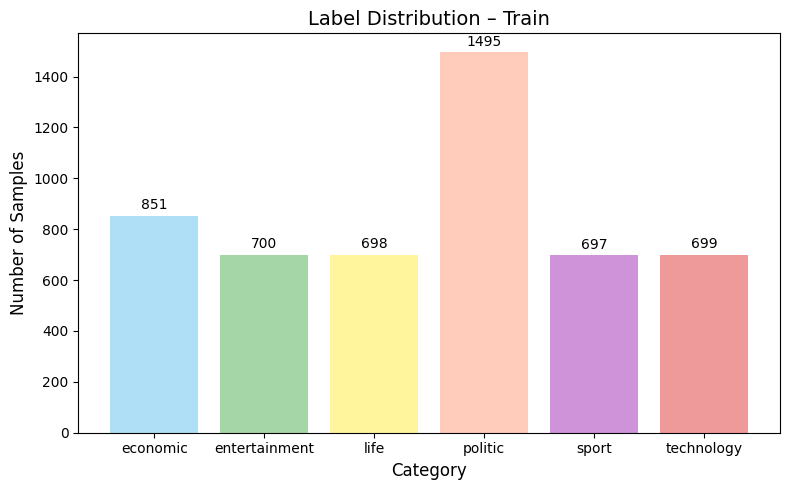

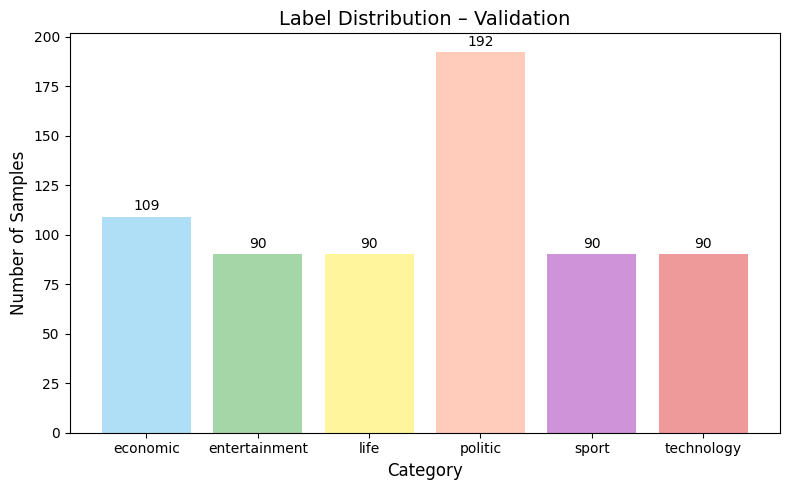

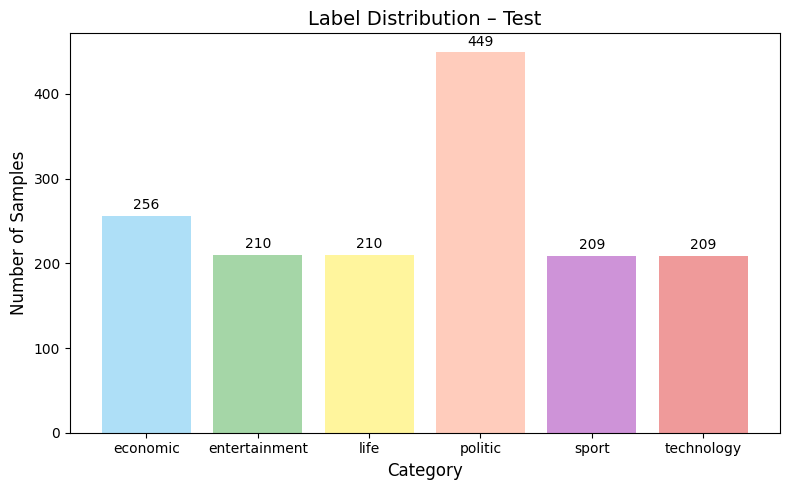

In [9]:
LABEL_NAMES = {
    0: "economic",
    1: "entertainment",
    2: "life",
    3: "politic",
    4: "sport",
    5: "technology"
}

plot_label_distribution_with_counts(train_df, "Train", LABEL_NAMES)
plot_label_distribution_with_counts(val_df, "Validation", LABEL_NAMES)
plot_label_distribution_with_counts(test_df, "Test", LABEL_NAMES)

In [4]:
train_df.head()

,content,label
0,ភ្នំពេញ សម្តេច តេជោ ហ៊ុន សែន នាយក រដ្ឋមន្ត្រី ...,3
1,រដ្ឋមន្ត្រី ក្រសួង ថាមពល ថៃ លោក Sontirat Sonti...,0
2,ត្រី បាឡែន ចារកម្ម មួយ ត្រូវបាន រកឃើញ ស្លាប់ ន...,2
3,មាន ដឹង ទេ ថា ជ័យលាភី ពាន អូស្កា ជនជាតិ ខ្មែរ ...,2
4,កម្ពុជា បាន ចុះហត្ថលេខា លើ អនុស្សរណៈ យោគយល់ គ្...,0


In [5]:
test_df.head()

,content,label
0,ភ្នំពេញ ក្នុង ឱកាស អញ្ជើញ ជា អធិបតីភាព សម្ពោធ ...,3
1,MUC ងិន ម៉ារ៉ាឌី បង្ហើប គម្រោង ចេញ ទៅ រស់ នៅ ស...,1
2,សេចក្តីប្រកាស ព័ត៌មាន មហោស្រព អក្សរសិល្ប៍ ខ្មែ...,1
3,ក្រុមហ៊ុន ហ៊ិន នីគែន ខេមបូឌា អំពាវនាវ ឱ្យ អ្នក...,5
4,Man Utd គិតគូរ នាំចូល កីឡាករ ក្នុង លក្ខខ័ណ្ឌ ខ...,4


In [6]:
val_df.head()

,content,label
0,OPPO Reno T Series ជំនាន់ ថ្មី បាន បង្ហាញ ខ្លួ...,5
1,យោង តាម លិខិត របស់ ក្រសួង មហាផ្ទៃ នា ថ្ងៃទី ខែ...,3
2,ភ្នំពេញ ទីបំផុត រដ្ឋសភា បាន បើក សម័យ ប្រជុំ ពេ...,3
3,ដឹង អត់ ថា នៅ កម្ពុជា បច្ចុប្បន្ន នេះ មាន កន្ល...,5
4,តាមរយៈ សេចក្តីថ្លែងការណ៍ នៅ ថ្ងៃទី វិច្ឆិកា ប្...,3
